In [69]:
import pandas as pd
import allel
import seaborn as sns

In [70]:
clim1001 = pd.read_csv('../key_files/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv')

clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)

ecotypeid_to_bio1 = clim1001.set_index('ecotypeid')['bio1'].to_dict()

In [12]:
samples = pd.read_csv('../key_files/merged_sample_table.csv')[['site', 'plot', 'generation', 'total_flower_counts']]

samples = samples.groupby(['site', 'plot', 'generation'])['total_flower_counts'].sum().reset_index()

samples['min_perc'] = 1/samples['total_flower_counts']

samples['code'] = samples['site'].astype(str) + '_'  + samples['generation'].astype(str) + '_' + samples['plot'].astype(str) 

ecotype_freq = pd.read_csv('../key_files/merged_ecotype_frequency.txt',sep = '\t')

climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

In [13]:
grenenet_ecotypes = pd.read_csv('../key_files/founder_ecotype_frequency.txt', sep = '\t',header=None)[0]

ecotype_freq = ecotype_freq.set_index(grenenet_ecotypes)

ecotype_freq = ecotype_freq.T 
ecotype_freq = ecotype_freq.reset_index()
ecotype_freq['generation'] = ecotype_freq['index'].str.split('_').str[1]

In [14]:
ecotype_freq['plot'] = ecotype_freq['index'].str.split('_').str[2]

ecotype_freq['site'] = ecotype_freq['index'].str.split('_').str[0] 

In [15]:
ecotype_freq = ecotype_freq.drop('index', axis=1)

In [16]:
ecotype_freq = ecotype_freq.melt(id_vars = ['plot','site', 'generation'])

In [17]:
ecotype_freq.columns = ['plot','site', 'generation', 'ecotype', 'freq']

In [18]:
clim1001f = clim1001[['ecotypeid', 'bio1']]

In [19]:
#clim1001f = clim1001f[clim1001f['bio1'] > 13]

In [20]:
clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)

/tmp/ipykernel_1080388/3068168531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)


In [21]:
ecotype_freq = ecotype_freq.merge(clim1001f, left_on = 'ecotype', right_on = 'ecotypeid')

In [22]:
ecotype_freq['generation'] = ecotype_freq['generation'].astype(int)

In [23]:
import numpy as np

In [24]:
# Assuming df is your DataFrame named ecotype_freq
# Ensure that the DataFrame contains only the relevant generations
df = ecotype_freq[ecotype_freq['generation'].isin([1, 2, 3])]

# Function to check if frequency increases
def is_increasing(group):
    # Ensure the group is sorted by generation
    group = group.sort_values(by='generation')
    # Check if the last frequency is greater than the first, given there are at least two data points to compare
    if len(group['freq']) > 1:
        return group['freq'].iloc[-1] > group['freq'].iloc[0]
    else:
        return np.nan  # Return False if not enough data to compare

# Group by site, plot, and ecotype, then apply the function and reset index properly
result = df.groupby(['site', 'plot', 'ecotype']).apply(is_increasing).reset_index(name='increased')


In [25]:
#import os

In [26]:
#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

In [27]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/worldclim_sitesdata.csv')

In [28]:
clim_sites_during_exp = clim_sites_during_exp[['site', 'bio1']]

In [29]:
clim_sites_during_exp['site'] = clim_sites_during_exp['site'].astype(str)

In [30]:
result['increased'].value_counts()

increased
False    43045
True     14243
Name: count, dtype: int64

In [31]:
result = result.merge(clim_sites_during_exp, on ='site')

In [32]:
result

,site,plot,ecotype,increased,bio1
0,1,1,159,False,8.720833
1,1,1,265,True,8.720833
2,1,1,763,False,8.720833
3,1,1,765,False,8.720833
4,1,1,766,False,8.720833
...,...,...,...,...,...
82000,9,9,10011,False,10.116667
82001,9,9,10013,False,10.116667
82002,9,9,10014,False,10.116667
82003,9,9,100001,False,10.116667


In [33]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp']

In [34]:
result = result.merge(clim1001f, left_on = 'ecotype', right_on ='ecotypeid')

In [35]:
result = result.drop('ecotypeid',axis=1)

In [36]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp', 'bio1_ecotype']

In [37]:
result['bio1_exp'] = result['bio1_exp'].round(2)
result['bio1_ecotype'] = result['bio1_ecotype'].round(2)

In [38]:
bioexp_vs_bioecotype = result.pivot_table(index = 'bio1_exp', columns = 'bio1_ecotype', values= 'increased' )

In [39]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.sort_index() 

In [40]:
sorted_columns = sorted(bioexp_vs_bioecotype.columns)
bioexp_vs_bioecotype = bioexp_vs_bioecotype[sorted_columns]

In [41]:
clim1001f['bio1'] = clim1001f['bio1'].round(2)

/tmp/ipykernel_1080388/1059384320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['bio1'] = clim1001f['bio1'].round(2)


In [42]:
clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)

/tmp/ipykernel_1080388/2563707021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)


In [43]:
clim1001f_dcit = clim1001f.set_index('bio1')['ecotype_bio1'].to_dict()

In [44]:
bioexp_vs_bioecotype.columns = bioexp_vs_bioecotype.columns.map(clim1001f_dcit)

In [45]:
clim_sites_during_exp['bio1'] = clim_sites_during_exp['bio1'].round(2)

In [46]:
clim_sites_during_exp['site_bio1'] = clim_sites_during_exp['site'].astype(str) + '_' + clim_sites_during_exp['bio1'].astype(str)

In [47]:
clim_sites_during_exp_dict = clim_sites_during_exp.set_index('bio1')['site_bio1'].to_dict()

In [48]:
bioexp_vs_bioecotype.index = bioexp_vs_bioecotype.index.map(clim_sites_during_exp_dict)

In [49]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.fillna(0)

In [50]:
bioexp_vs_bioecotype

bio1_ecotype,766_-4.28,7298_-3.27,763_-3.0,765_-2.49,9766_-1.93,768_0.72,9634_1.22,772_1.62,8354_1.88,9632_2.66,...,9879_16.59,9522_16.62,9726_17.17,9559_17.18,7067_17.23,7063_17.7,9657_17.75,9944_17.84,6939_18.33,6911_22.7
bio1_exp,,,,,,,,,,,,,,,,,,,,,
27_5.34,0.100000,0.300000,0.400000,0.200000,0.200000,0.100000,0.100000,0.200000,0.200000,0.200000,...,0.100000,0.300000,0.300000,0.200000,0.200000,0.100000,0.200000,0.300000,0.200000,0.300000
24_5.41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
48_7.33,0.000000,0.800000,0.200000,0.200000,0.200000,0.000000,0.000000,0.200000,0.200000,0.000000,...,0.600000,0.400000,0.200000,0.800000,0.600000,1.000000,0.200000,0.400000,0.800000,0.400000
25_7.9,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333
42_8.34,0.000000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.400000,0.400000,0.200000,0.300000,0.200000,0.100000,0.200000,0.200000,0.200000,0.200000
1_8.72,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.083333,...,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333
55_8.93,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.200000,0.200000,0.100000,0.100000,0.000000,0.100000,0.100000,0.200000,0.100000,0.100000
52_9.27,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
49_9.39,0.363636,0.272727,0.363636,0.272727,0.363636,0.181818,0.181818,0.363636,0.181818,0.181818,...,0.000000,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.181818,0.000000


In [51]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

In [52]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

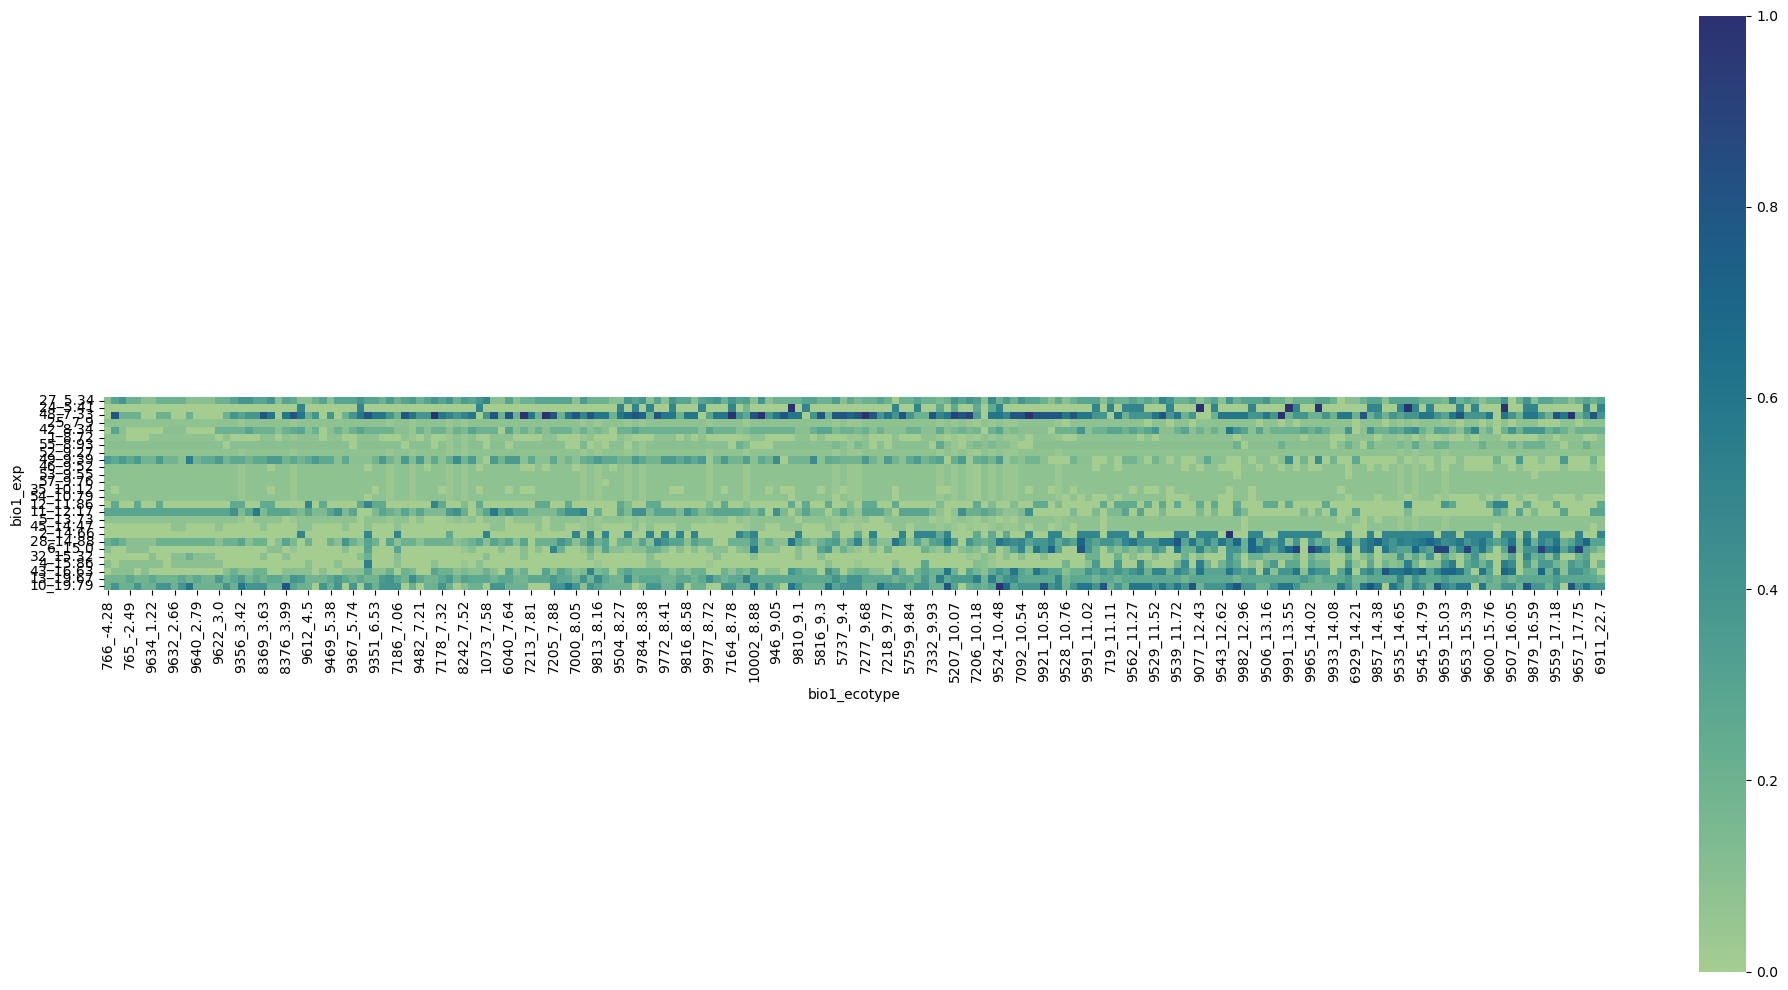

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bioexp_vs_bioecotype is your DataFrame
plt.figure(figsize=(20, 10))  # Set the size of the figure

# Create the heatmap with a horizontal color bar at the top
ax = sns.heatmap(bioexp_vs_bioecotype, cmap="crest",     square=True,
) # cbar_kws={'orientation': 'horizontal', 'label': 'Color scale', 'location': 'top'}

# Optionally adjust layout to make room for tick labels
plt.tight_layout()
#plt.savefig('bio1_exp_vs_collectionsite.png')
# Show the plot
plt.show()

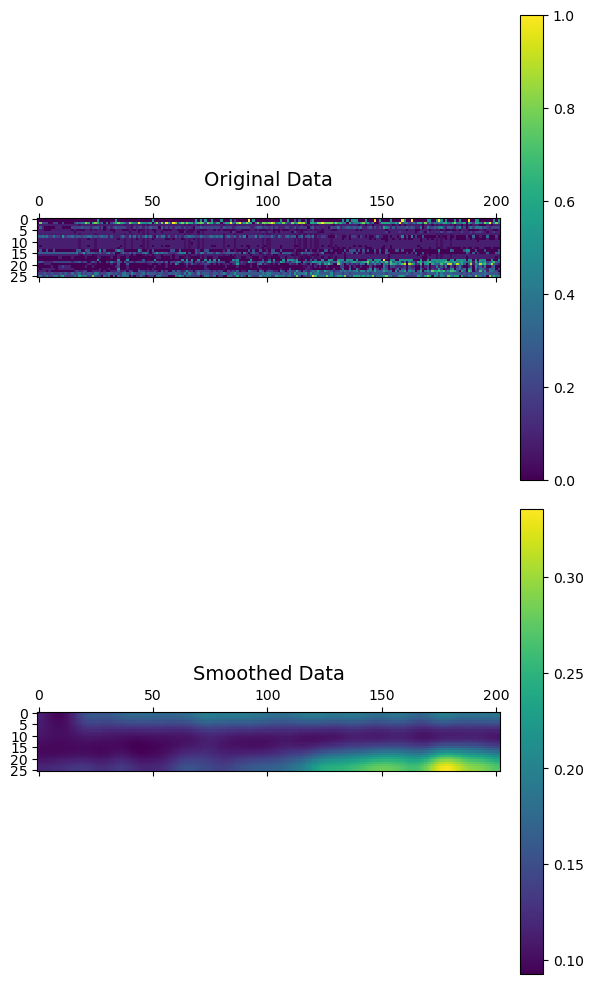

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Convert DataFrame to a NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create taller figure with more height
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(6, 10))  # Taller rather than wider

# Plot the original data
cax1 = ax1.matshow(data_matrix, cmap='viridis')
ax1.set_title("Original Data", fontsize=14)
fig.colorbar(cax1, ax=ax1, fraction=0.046, pad=0.04)  # Adjust colorbar size

# Plot the smoothed data
cax2 = ax2.matshow(smoothed_matrix, cmap='viridis')
ax2.set_title("Smoothed Data", fontsize=14)
fig.colorbar(cax2, ax=ax2, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

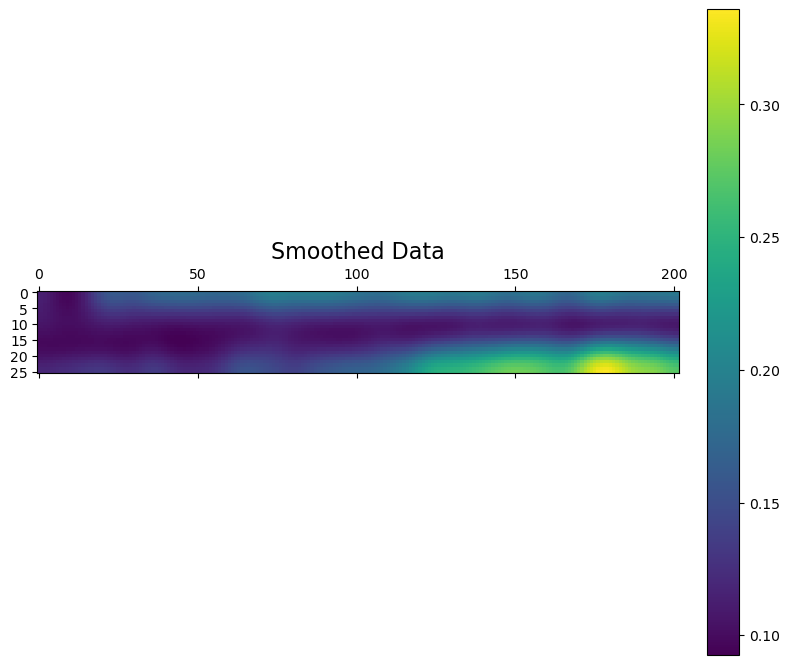

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20, 6))
# Assuming bioexp_vs_bioecotype is already available as your DataFrame
# Convert DataFrame to NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create a larger figure specifically for the smoothed plot
fig, ax = plt.subplots(figsize=(8, 10))  # Make the plot bigger with 8 width and 10 height

# Plot the smoothed data
cax = ax.matshow(smoothed_matrix, cmap='viridis')

# Add a title with larger font size
ax.set_title("Smoothed Data", fontsize=16)

# Add colorbar and adjust its size
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
smoothed_matrix

array([[0.11461181, 0.11363203, 0.11177809, ..., 0.19113038, 0.19160324,
        0.19186659],
       [0.1143964 , 0.11343994, 0.11163039, ..., 0.18762217, 0.18806579,
        0.18831337],
       [0.11399862, 0.11308692, 0.11136253, ..., 0.18092298, 0.18131195,
        0.18153005],
       ...,
       [0.11453456, 0.11467684, 0.11495686, ..., 0.26558645, 0.26353787,
        0.26244231],
       [0.11713564, 0.11729357, 0.11760378, ..., 0.27181448, 0.26974996,
        0.26864486],
       [0.11854963, 0.11871581, 0.11904188, ..., 0.27495911, 0.27288909,
        0.27178053]])

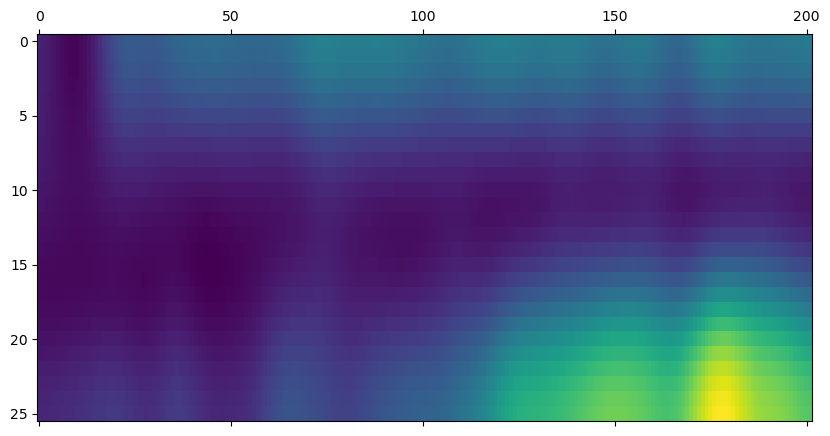

In [68]:
plt.figure(figsize=(10,5))
plt.matshow(smoothed_matrix, cmap='viridis',interpolation=None, aspect='auto',fignum=1)